### Bài thực hành Lab 02

### Nguyễn Minh Hoàng 18110095

In [1]:
import numpy as np
import tensorflow as tf
import os
import random 

from tensorflow import keras
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
                Dense, Activation, 
                Dropout, Flatten, 
                Conv2D, MaxPooling2D,
                 BatchNormalization
                )
from tensorflow.keras import regularizers

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

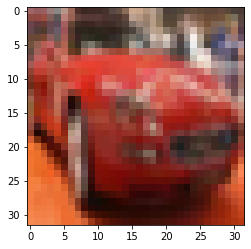

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(X_train[5])
plt.show()

In [4]:
#Scale ảnh
X_train, X_test = X_train.astype('float32')/255.0, X_test.astype('float32')/255.0

#in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size=0.2,
                                                      random_state= 42)

In [6]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


#### Hãy code thử mạng VGG16

In [7]:

def set_seed(seed_value):
  # Hàm này dùng để chỉnh seed về con số cố định
  os.environ['PYTHONHASHSEED']=str(seed_value)
  random.seed(seed_value)
  np.random.seed(seed_value)
  tf.random.set_seed(seed_value)
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)

def model_vgg16():
  seed_value = 0
  # chọn giá trị seed để khởi tạo các tham số nhằm reproduce lại kết quả
  set_seed(seed_value)
  model = Sequential()
  #block 1
  model.add(Conv2D(filters=64,
                  input_shape=(32,32,3),
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=64,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(MaxPooling2D(
                  pool_size=[2,2],
                  strides=[2,2]))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  #block 2
  model.add(Conv2D(filters=128,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=128,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(MaxPooling2D(
                  pool_size=[2,2],
                  strides=[2,2]))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  #block 3
  model.add(Conv2D(filters=256,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=256,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value)))
  model.add(Conv2D(filters=256,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(MaxPooling2D(
                  pool_size=[2,2],
                  strides=[2,2]))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  # block 4
  model.add(Conv2D(filters=512,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=512,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=512,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(MaxPooling2D(
                  pool_size=[2,2],
                  strides=[2,2]))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  # block 5
  model.add(Conv2D(filters=512,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=512,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(Conv2D(filters=512,
                  kernel_size=[3,3],
                  strides=[1,1],
                  padding="same",
                  activation=tf.nn.relu,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(MaxPooling2D(
                  pool_size=[2,2],
                  strides=[2,2]))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  # block cuối 
  model.add(Flatten())
  model.add(Dense(
                  units = 200,
                  activation = tf.nn.relu, 
                  kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                  bias_regularizer=regularizers.l2(1e-4),
                  activity_regularizer=regularizers.l2(1e-5),
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  model.add(Dense(
                  units = 200,
                  activation = tf.nn.relu, 
                  kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                  bias_regularizer=regularizers.l2(1e-4),
                  activity_regularizer=regularizers.l2(1e-5),
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  model.add(BatchNormalization())
  model.add(Dropout(
                    rate = 0.5))
  model.add(Dense(
                  units = 10,
                  activation = tf.nn.softmax,
                  kernel_initializer=keras.initializers.glorot_uniform(seed=seed_value),
                  bias_initializer = keras.initializers.glorot_uniform(seed = seed_value)))
  return model

vgg16 = model_vgg16()  
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       1

In [8]:

batch_size = 128

vgg16.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001*5),
              metrics=['accuracy']
              )

mc = keras.callbacks.ModelCheckpoint(filepath="epoch: {epoch:02d}.hdf5", 
                                     monitor='val_accuracy',
                                     mode='max', 
                                     verbose=1,
                                     save_best_only=True)

## Train 
history = vgg16.fit(X_train, y_train,
                    batch_size= batch_size,
                    epochs= 30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])      


Epoch 1/30
313/313 [==============================] - 52s 146ms/step - loss: 2.6636 - accuracy: 0.1707 - val_loss: 18.7879 - val_accuracy: 0.0996

Epoch 00001: val_accuracy improved from -inf to 0.09960, saving model to epoch: 01.hdf5
Epoch 2/30
313/313 [==============================] - 44s 140ms/step - loss: 2.0790 - accuracy: 0.2670 - val_loss: 2.7636 - val_accuracy: 0.2496

Epoch 00002: val_accuracy improved from 0.09960 to 0.24960, saving model to epoch: 02.hdf5
Epoch 3/30
313/313 [==============================] - 44s 140ms/step - loss: 1.8324 - accuracy: 0.3416 - val_loss: 3.8907 - val_accuracy: 0.3261

Epoch 00003: val_accuracy improved from 0.24960 to 0.32610, saving model to epoch: 03.hdf5
Epoch 4/30
313/313 [==============================] - 44s 140ms/step - loss: 1.6863 - accuracy: 0.4010 - val_loss: 2.1681 - val_accuracy: 0.3710

Epoch 00004: val_accuracy improved from 0.32610 to 0.37100, saving model to epoch: 04.hdf5
Epoch 5/30
313/313 [==============================] - 

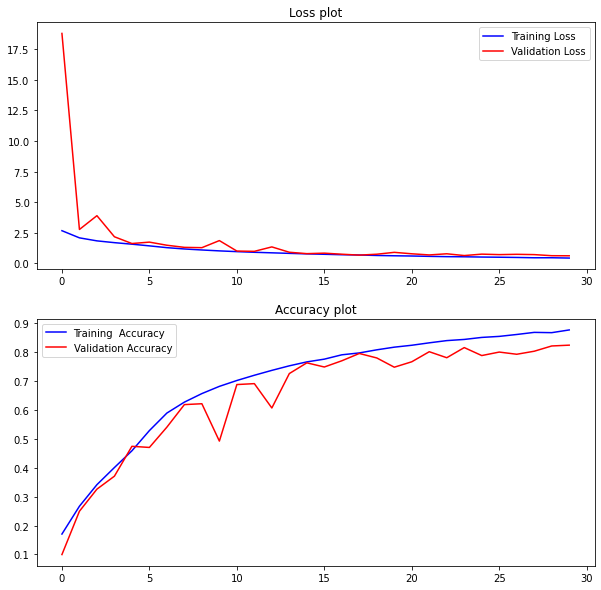

In [19]:
f,ax=plt.subplots(2,1, figsize = (10,10)) 

ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')
ax[0].set_title('Loss plot')
ax[0].legend()
#----------------------------------
ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].set_title('Accuracy plot')
ax[1].legend();

#### Nêu cách chọn ra epoch thứ bao nhiêu làm cho model tốt nhất 

Nhìn vào đồ thị **loss plot**, ta thấy rằng loss giữa tập train và validation khá gần nhau nên ta chưa thể rút ra kết luận đối với hình này. 
Đối với **accuracy plot** thì ta thấy rằng từ **epoch 21** trở đi thì khoảng cách giữa train accuracy và validation accuracy có phần lớn hơn và đồng thời train accuracy > validation accuracy nên ta nhận ra đó là hiện tượng overfitting ở model này. Ta có thể cân nhắc dừng train ở ngay **epoch 21** đó nhưng ta thấy rằng khoảng cách giữa train accuracy và validation accuracy vẫn không tăng đáng kể và ta vẫn muốn cải thiện accuracy ở cả 2 tập với model này nên ta chọn **epoch 30** là tốt nhất.

In [11]:
#ta chọn epoch thứ 30 làm best model
model = tf.keras.models.load_model("/content/epoch: 30.hdf5")
result = model.evaluate(X_test,y_test)
print("loss và accuracy trên tập test là {} {}".format(result[0],result[1]))

313/313 [==============================] - 7s 20ms/step - loss: 0.6187 - accuracy: 0.8245
loss và accuracy trên tập test là 0.6187318563461304 0.8245000243186951
